# <mark> <b> > 3. </b> Conferencia e ajustes do Pipeline </mark>

<b> 3_conf_doc_extract_v0.ipynb </b> |  Notebook com as funçoes para Analise e conferencia do pipeline

### Modules & config

In [1]:
import os
import sys
import shutil
import platform
from io import StringIO
from pathlib import Path
from urllib import response

from outlook_msg import Message
import extract_msg
import zipfile
from pyunpack import Archive
import py7zr

import re
from unidecode import unidecode
from unicodedata import normalize
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import PyPDF2

import csv
import json
import pandas as pd

import uuid
import hashlib

import locale
import time, copy
from pytz import timezone
from datetime import datetime, timezone, timedelta

import cv2
import fitz  # Módulo PyMuPDF
from PIL import Image
from PIL import ImageFont
from PIL import Image, ImageDraw
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTChar
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

import pytesseract

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import logging

# Modulos da solucao
# import modules.extrai_pdf_pesquisavel as Extc
import modules.cronometro as cron
import modules.nova_extracao_pdf_pesquisavel as novaextra 


In [2]:
#### Config - E-mail
# 1. Caminho do arquivo uma mensagem especifica
msg_dir_path = 'pipeline_extracao_documentos/1_emails_documentos_recebidos/11_emails'

# 2. Path para arquivos atachados compactados
msg_attachment_zip = 'pipeline_extracao_documentos/1_emails_documentos_recebidos/13_attachments'


#### Config - messages
# 3. Caminho do arquivo uma mensagem especifica
msg_outros_path = 'pipeline_extracao_documentos/1_emails_documentos_recebidos/12_messages'

# 4. Path para arquivos recebidos manualmente
arquivos_recebidos_path = 'pipeline_extracao_documentos/1_emails_documentos_recebidos/14_documentos_recebidos'


####Config Processamento Pipeline

# 5. Path para documentos para extracao
documentos_extracao_path = "pipeline_extracao_documentos/2_documentos_para_extracao/21_aguardando_processamento"

# 6. Path para gestao de imagens resized
image_resized_path = "pipeline_extracao_documentos/6_geral_administacao/temp_docs/images/processadas"



# 7. path para arquivos json
json_path = "pipeline_extracao_documentos/5_documentos_processados/jsons"

# 7. Path para DFs e CSVs exportados
export_path = "pipeline_extracao_documentos/6_geral_administacao/exports"

# 8. Path para lixeira
root_garbage_path = "pipeline_extracao_documentos/0_lixeira"


#### paths de objetos para criacao/gestao (dicionarios/datasets)
cnae_dict_path = "pipeline_extracao_documentos/6_geral_administacao/datasets/CNAE_X_ITEM_SERVICO_PREFEITURAS.xlsx"


# 12. poppler path
poppler_path = "/home/dani-boy/miniconda3/envs/tables-detr/bin"

# 13. path para config Tesseract
#tessdata_dir_config = '--tessdata-dir "/home/dani-boy/miniconda3/envs/tables-detr/share/tessdata/" --user-patterns "novo_modelo/modelos/user-patterns2.txt" --dpi 600 --oem 3 --psm 6'

#Modelo atual
#tessdata_dir_config = '--tessdata-dir "/home/dani-boy/miniconda3/envs/tables-detr/share/tessdata/" --user-patterns "novo_modelo/modelos/user-patterns2.txt" --dpi 600 --oem 3 --psm 6'

# definindo localizadcao para pt_BR
locale.setlocale(locale.LC_TIME, "pt_BR.utf8")

logging.basicConfig(
    filename='processamentos/log_ocorrencias.log',
    level=logging.INFO, 
    format='%(asctime)s - %(levelname)s - %(message)s', 
    datefmt='%d/%m/%Y %H:%M:%S'
)

logging.info("kernel reiniciado")

### <mark> <b>2.3.1</b> Conferencia do Processamento </mark> 

In [ ]:
# Ajuste a largura máxima das colunas para um valor específico (por exemplo, 100 caracteres)
pd.set_option('display.max_colwidth', 200)


# Criando o subset para analise
df_conf = df[['seq', 'original_file_name', 'file_path']]
df_conf

In [ ]:
df['action_item'] = pd.Categorical(df['action_item'], categories=ordem_action_item, ordered=True)

In [ ]:
# Ajuste a largura da coluna 'sua_coluna' para 50 caracteres
df_conf['file_path'].astype(str).str.ljust(100), inplace=True)

In [ ]:
# Parte3 - Dados Tomador - OK
df_conf3 = df[['t_cpf_cnpj_com_mascara', 't_cpf_cnpj_sem_mascara','t_telefone', 't_inscricao_municipal', 't_razao_social','t_endereco','t_email', 'discriminacao_servicos', 'pdf_pesquisavel']] #
df_conf3

In [ ]:
# Parte 4- Outros itens
df_conf4 = df[['seq', 'original_file_name', 'pdf_pesquisavel', 'discriminacao_servicos', 'valor_total_nota', 'cnae', 'item_lista_servicos']] #
df_conf4

In [ ]:
'prefeitura', 'pdf_pesquisavel', 'image_np'

In [ ]:
df.to_excel('teste2.xlsx')
# IMPORTANTE, saber o tipo da coluna
print(df['status_documento'].dtype)

In [ ]:
df_root_pipe.head(50)

In [ ]:
df.set_index('document_unique_id', inplace=True)

In [ ]:
# 1. XXX Volto novamente o indice do DF
df_conferencia.set_index('document_unique_id', inplace=True)

In [ ]:
# 10. XXX Salvo em Excel (pode ser feito durante fases)
df_conferencia.to_excel("processamento_mage_1.xlsx", index=True)

In [ ]:
# 0. XXX SE deseja importar o DF df_analise_pipe

df_conf_path = "processamento_mage_1.xlsx"


#Le a planilha e cria df_documento_recebido
df_conferencia = pd.read_excel(df_conf_path)

In [ ]:
df_processamento = pd.concat([df_conf, df_conf2, df_conf3, df_conf4,], ignore_index=False)

In [ ]:
# XXX Criando uma nova coluna no DF
df_conferencia.insert(loc=50, column='original_file_name', value=df_conferencia['file_path'].apply(lambda x: os.path.basename(x)))

In [ ]:
# XXX Criando uma nova coluna no DF
df_conferencia.insert(loc=50, column='original_file_name', value=df_conferencia['file_path'].apply(lambda x: os.path.basename(x)))

df['coluna_cnae'] = df['coluna_cnae'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
# 10. XXX Salvo em Excel (pode ser feito durante fases)
df_root_pipe.to_excel("df_analise_pipe_b21.xlsx", index=True)

In [ ]:
# Ajuste a largura máxima das colunas para um valor específico (por exemplo, 100 caracteres)
pd.set_option('display.max_colwidth', 100)

In [ ]:
# Ajuste a largura da coluna 'sua_coluna' para 50 caracteres
df_conf['cabecalho'] = df_conf['cabecalho'].astype(str).str.ljust(100)

### <mark> <b>2.3.2</b> ExportaÇao do Json </mark>

In [ ]:
df_conf_avalida_batch_21['numero_nota_fiscal'] = df_conf_avalida_batch_21['numero_nota_fiscal'].astype(int)

In [16]:
# 1 XXX. Leio a planilha de conferencia avalidada
conf_export_path = "processamentos/mapeamento_analise/df_root_Batch_21.xlsx"


#Le a planilha e cria do DF
df_conf_validada = pd.read_excel(conf_export_path)

In [17]:
df_conf_validada

,document_unique_id,seq,date_time,batch,fase_processo,nome_atividade,status_documento,acao_executada,original_file_name,directory,one_page,pages,palavra_chave,document_tag,action_item,level,parent_document_unique_id,file_hash,file_path,informations
0,c4dc0fca-4edf-4547-96e3-26790aae2549,1,23/09/2023 12:52:11,Batch_21,analise,scan_analise,root_analise,Analise,NF CRJ PRIMEIRA QUINZENA DE JULHO DE 2023.pdf,11756286,True,1,NF,prov_nota_fiscal,NO_PROCESS,3,f976c128-1f41-4551-bffd-fac687c1c8b2,b3acfffea4847108d0064ecbd62a73359961f88741a037...,pipeline_extracao_documentos/2_documentos_para...,
1,1789136f-6c11-4fe8-a27b-0e38714bbddf,2,23/09/2023 12:52:11,Batch_21,analise,scan_analise,root_analise,Analise,Nota Fiscal Eletrônica Quallit 24072023.pdf,11766341,True,1,nota,prov_nota_fiscal,NO_PROCESS,3,f976c128-1f41-4551-bffd-fac687c1c8b2,ae37292a66dff093838f3cde0da8bea332ec81241b1d5f...,pipeline_extracao_documentos/2_documentos_para...,
2,5bed1512-08fc-4397-8a5c-90fe3b8c97f0,3,23/09/2023 12:52:11,Batch_21,analise,scan_analise,root_analise,Analise,NFE 20237.pdf,11624359,True,1,NF,prov_nota_fiscal,NO_PROCESS,3,f976c128-1f41-4551-bffd-fac687c1c8b2,1976ffe84e27b6bb1a5840018c4a47f6bac483b10f686a...,pipeline_extracao_documentos/2_documentos_para...,
3,db839bcc-55b5-4890-8259-01c447b7b5b5,4,23/09/2023 12:52:11,Batch_21,analise,scan_analise,root_analise,Analise,Ampla.pdf,11777624,True,1,default,prov_nota_fiscal,NO_PROCESS,3,f976c128-1f41-4551-bffd-fac687c1c8b2,ad2522b53349fffd748376bca7fe4b90fd59359971d992...,pipeline_extracao_documentos/2_documentos_para...,
4,f41c0878-079b-4520-9168-b376391f2e85,5,23/09/2023 12:52:11,Batch_21,analise,scan_analise,root_analise,Analise,Supernova.pdf,11777624,True,1,default,prov_nota_fiscal,NO_PROCESS,3,f976c128-1f41-4551-bffd-fac687c1c8b2,c26954dad71d508d4b5315f69dc4c6291a1c5bf70548e7...,pipeline_extracao_documentos/2_documentos_para...,
5,d4ea208e-caaf-41a6-924c-01b02ed0d147,6,23/09/2023 12:52:11,Batch_21,analise,scan_analise,root_analise,Analise,Blue Lord.pdf,11777624,True,1,default,prov_nota_fiscal,NO_PROCESS,3,f976c128-1f41-4551-bffd-fac687c1c8b2,63b6603be7b1df359e67b96e9e128336b46fa3fbcfdadc...,pipeline_extracao_documentos/2_documentos_para...,
6,ff641182-55a6-496c-be94-d36c212a8518,7,23/09/2023 12:52:11,Batch_21,analise,scan_analise,root_analise,Analise,NF 2023158.pdf,11285853,True,1,NF,prov_nota_fiscal,NO_PROCESS,3,f976c128-1f41-4551-bffd-fac687c1c8b2,abcfcce04cabd261b30730f04cbb98e030f2a765bb31aa...,pipeline_extracao_documentos/2_documentos_para...,
7,b5636ddc-4bb8-4e8a-a0de-867548fd50a5,8,23/09/2023 12:52:11,Batch_21,analise,scan_analise,root_analise,Analise,NF 2023157.pdf,11285853,True,1,NF,prov_nota_fiscal,NO_PROCESS,3,f976c128-1f41-4551-bffd-fac687c1c8b2,c8c5ae8ccca5e9befb6445e21701dc99266746e877c630...,pipeline_extracao_documentos/2_documentos_para...,
8,9bc6aaf8-e05a-49d6-9642-8f44eb69ea95,9,23/09/2023 12:52:11,Batch_21,analise,scan_analise,root_analise,Analise,nota_07_2023.pdf,11778425,True,1,nota,prov_nota_fiscal,NO_PROCESS,3,f976c128-1f41-4551-bffd-fac687c1c8b2,33bc08587f5c227ab3e035011ed9b20340f99599e65ff7...,pipeline_extracao_documentos/2_documentos_para...,
9,3d1dc634-8e1f-448d-a3b7-c36a5a678e01,10,23/09/2023 12:52:11,Batch_21,analise,scan_analise,root_analise,Analise,nf 59.pdf,11359989,True,1,NF,prov_nota_fiscal,NO_PROCESS,3,f976c128-1f41-4551-bffd-fac687c1c8b2,59274230e7fb7897397bb426ac31d953e2a14def1fd25e...,pipeline_extracao_documentos/2_documentos_para...,


In [56]:
# 2. XXX Volto novamente o indice do DF
df_conf_validada.set_index('document_unique_id', inplace=True)

In [ ]:
df_conf_validada.columns

In [ ]:
df_conferencia_colunas = df_conf_validada[['batch', 'parent_file', 'municipio', 'numero_nota_fiscal', 'codigo_verificacao', 'competencia', 'dt_hr_emissao', 'prefeitura', 'p_cpf_cnpj_com_mascara', 'p_cpf_cnpj_sem_mascara','p_telefone', 'p_inscricao_estadual', 'p_inscricao_municipal', 'p_razao_social', 'p_nome_fantasia','p_endereco','p_email', 't_cpf_cnpj_com_mascara', 't_cpf_cnpj_sem_mascara','t_telefone', 't_inscricao_municipal', 't_razao_social','t_endereco','t_email', 'discriminacao_servicos', 'valor_total_nota', 'cnae', 'item_lista_servicos','valor_servicos', 'valor_deducao', 'desc_incond', 'base_calculo', 'aliquota', 'valor_iss', 'valor_iss_retido', 'desc_cond', 'valor_pis', 'valor_cofins', 'valor_ir', 'valor_inss', 'valor_csll', 'outras_retencoes', 'valor_liquido', 'exigibilidade_iss', 'regime_tributacao', 'simples_nacional', 'issqn_retido', 'local_pretacao_servico', 'local_incidencia', 'dados_complementares', 'observacao','de_para_pm', 'batch', 'model','directory','file_path']]
df_conferencia_colunas

In [70]:
batch_name = 'batch_22'
de_para_pm = 'PM_SAO'
arquivo_zip = "SAO PEDRO DA ALDEIA_PDF_25292023_1443.zip"
nome_formado_json = batch_name +".json"
municipio = 'SAO PEDRO DA ALDEIA'
data_processamento = cron.timenow_pt_BR()

In [71]:
titulo = (f'Processamento {batch_name} - {de_para_pm} - data:{data_processamento}')

In [72]:
# Lista para armazenar os dicionários
dados_json = {}

# Iterar sobre cada linha no DataFrame
for index, row in df_conf_validada.iterrows():
    # dados_df e o dicionario para armazenar os dados da nota fiscal atual
    #diretorio = str(row['directory'])
    dados_nf = {
            "dados_NF_PDF": {
                                "data_cabecalho": {
                                    "secao": "1 - CABECALHO",
                                    "nome_prefeitura": row['prefeitura'],
                                    "numero_nota_fiscal": row['numero_nota_fiscal'],
                                    "competencia": row['competencia'],
                                    "dt_hr_emissoa": row['dt_hr_emissao'],
                                    "codigo_verificacao": row['codigo_verificacao']
                                },
                                "data_prestador": {
                                    "secao": "2. PRESTADOR DE SERVIÇO",
                                    "cpf_cnpj_com_mascara": row['p_cpf_cnpj_com_mascara'],
                                    "cpf_cnpj_sem_mascara": row['p_cpf_cnpj_sem_mascara'],
                                    "inscricao_municipal": row['p_inscricao_municipal'],
                                    "inscricao_estadual": row['p_inscricao_estadual'],
                                    "telefone": row['p_telefone'],
                                    "razao_social": row['p_razao_social'],
                                    "nome_fantasia": row['p_nome_fantasia'],
                                    "endereco": row['p_endereco'],
                                    "email": row['p_email']
                                },
                                "data_tomador": {
                                    "secao": "3. TOMADOR DE SERVIÇO",
                                    "cpf_cnpj_com_mascara": row['t_cpf_cnpj_com_mascara'],
                                    "cpf_cnpj_sem_mascara": row['t_cpf_cnpj_sem_mascara'],
                                    "rg": row['t_rg'],
                                    "inscricao_municipal": row['t_inscricao_municipal'],
                                    "inscricao_estadual": row['t_inscricao_estadual'],
                                    "telefone": row['t_telefone'],
                                    "razao_social": row['t_razao_social'],
                                    "endereco": row['t_endereco'],
                                    "email": row['t_email']
                                },
                                "data_servico": {
                                    "secao": "4. DESCRIMINACAO DOS SERVIÇOS",
                                    "discriminacao_servicos": row['discriminacao_servicos']
                                },
                                "data_valor_total": {
                                    "secao": "5. VALOR TOTAL",
                                    "valor_total_nota": row['valor_total_nota']
                                },
                                "data_CNAE": {
                                    "secao": "6. CNAE e Item da Lista de Serviços",
                                    "cnae": row['cnae'],
                                    "item_lista_servicos": row['item_lista_servicos']
                                },
                                "data_valores": {
                                    "secao": "7. VALORES E IMPOSTOS",
                                    "valor_servicos": row['valor_servicos'],
                                    "valor_deducao": row['valor_deducao'],
                                    "desc_incond" : row['desc_incond'],
                                    "base_calculo": row['base_calculo'],
                                    "aliquota": row['aliquota'],
                                    "valor_iss": row['valor_iss'],
                                    "valor_iss_retido": row['valor_iss_retido'],
                                    "desc_cond": row['desc_cond'],
                                    "valor_pis": row['valor_pis'],
                                    "valor_cofins": row['valor_cofins'],
                                    "valor_ir": row['valor_ir'],
                                    "valor_inss": row['valor_inss'],
                                    "valor_csll": row['valor_csll'],
                                    "outras_retencoes": row['outras_retencoes'],
                                    "valor_liquido": row['valor_liquido']
                                },
                                "data_dados_complementares": {
                                    "secao": "8. DADOS COMPLEMENTARES",
                                    "dados_complementares": row['dados_complementares']
                                },
                                "data_outras_informacoes": {
                                    "secao": "9. OUTRAS INFORMAÇOES / CRITICAS",
                                    "exigibilidade_iss": row['exigibilidade_iss'],
                                    "regime_tributacao": row['regime_tributacao'],
                                    "simples_nacional": row['simples_nacional'],
                                    "issqn_retido": row['issqn_retido'],
                                    "local_prestacao_servico": row['local_pretacao_servico'],
                                    "local_incidencia": row['local_incidencia']
                                },
                                "data_observacao": {
                                    "secao": "10. OBSERVACOES",
                                    "observacao": row['observacao']
                                },
                            },
                            "batch": row['batch'],    
                            "diretorio": str(row['directory']),
                            "nome_arquivo": row['original_file_name'],
                            "pdf_pesquisavel": row['pdf_pesquisavel'],
                            "modelo": row['model'],   
                            "document_unique_id": index,
                            "parent_file": row['parent_file'],
                    }        
            
    
    numero_nota_fiscal = str(row['numero_nota_fiscal'])
    dados_json['titulo'] = titulo
    dados_json['batch'] = batch_name
    dados_json['municipio'] = municipio
    # dados_json['data_processamento'] = cron.timenow_pt_BR()
    dados_json[numero_nota_fiscal] = dados_nf

# Salvando em formato JSON
json_file_path = os.path.join(json_path, nome_formado_json)
with open(json_file_path, 'w', encoding='utf-8') as f:
    json.dump(dados_json, f, ensure_ascii=False, indent=4)
    
print(f"As informações foram salvas em {json_file_path}")  


    

As informações foram salvas em pipeline_extracao_documentos/5_documentos_processados/jsons/batch_22.json


### <mark> <b>2.3.3. 1</b> Desenho do Template Mathplotlib </mark>

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [4]:
# Para testes, NAO JOGAR FORA

file_path = "pipeline_extracao_documentos/2_documentos_para_extracao/21_aguardando_processamento/Batch_21/SAO PEDRO DA ALDEIA_PDF_31282023_2257/11756286/NF CRJ PRIMEIRA QUINZENA DE JULHO DE 2023.pdf"
original_file_name = os.path.basename(file_path)

model = "SPA"
pdf_pesquisavel_map = False
mapping_method = "frame_&_sframe_field" # significa que as coordenadas estao em frames e os valores dos campos nos sframe_fields
context_mapping = "data_cabecalho"

In [6]:
file_path = "processamentos/temp/images/processadas/1.jpg"

In [7]:
image = Image.open(file_path).convert("RGB")
# Converta a imagem para um array NumPy
image_np = np.array(image)

In [ ]:
    # Determine as colunas de coordenadas a serem usadas
    x0_col, y0_col, x1_col, y1_col = ('x0_p', 'y0_p', 'x1_p', 'y1_p') if is_searchable else ('x0', 'y0', 'x1', 'y1')

In [8]:
color_mapping = {
    "red": (1, 0, 0),
    "purple": (0.5, 0, 0.5),
    "orange": (1, 0.647, 0),
    "green": (0, 0.5, 0.196),
    "blue": (0, 0, 1),
    "yellow": (1, 1, 0),
}


def draw_boxes(image_np, df, modelo, draw_types=None):
    plt.figure(figsize=(25, 25))
    plt.imshow(image_np)
    plt.axis('off')
    
    # Filtrar baseado no modelo e nos tipos de "boxes" a serem desenhados
    filtered_df = df[df['model'] == modelo]
    if draw_types:
        filtered_df = filtered_df[filtered_df['type'].isin(draw_types)]
    
    for index, row in filtered_df.iterrows():
        x0, y0, x1, y1 = row['x0'], row['y0'], row['x1'], row['y1']
        
        color = color_mapping.get(row['color'], 'black')
        
        # Adicionando o retângulo
        plt.gca().add_patch(Rectangle((x0, y0), x1-x0, y1-y0, linewidth=1, edgecolor=color, facecolor='none'))
        
        # Adicionando o rótulo, se existir
        label = str(row['label']) if pd.notnull(row['label']) else None
        if label:
            plt.text(x0 + 10, y0 - 15, label, color=color, fontsize=10)
            plt.text(x0 + 20, y0 + 55,(x0, y0, x1, y1), color='black', fontsize=7)

    
    plt.show()


In [10]:
nf_model_path = "config/modelos/frames_nf_v11.xlsx"


#Le a planilha e cria do DF
frames_nf_v4_df = pd.read_excel(nf_model_path)

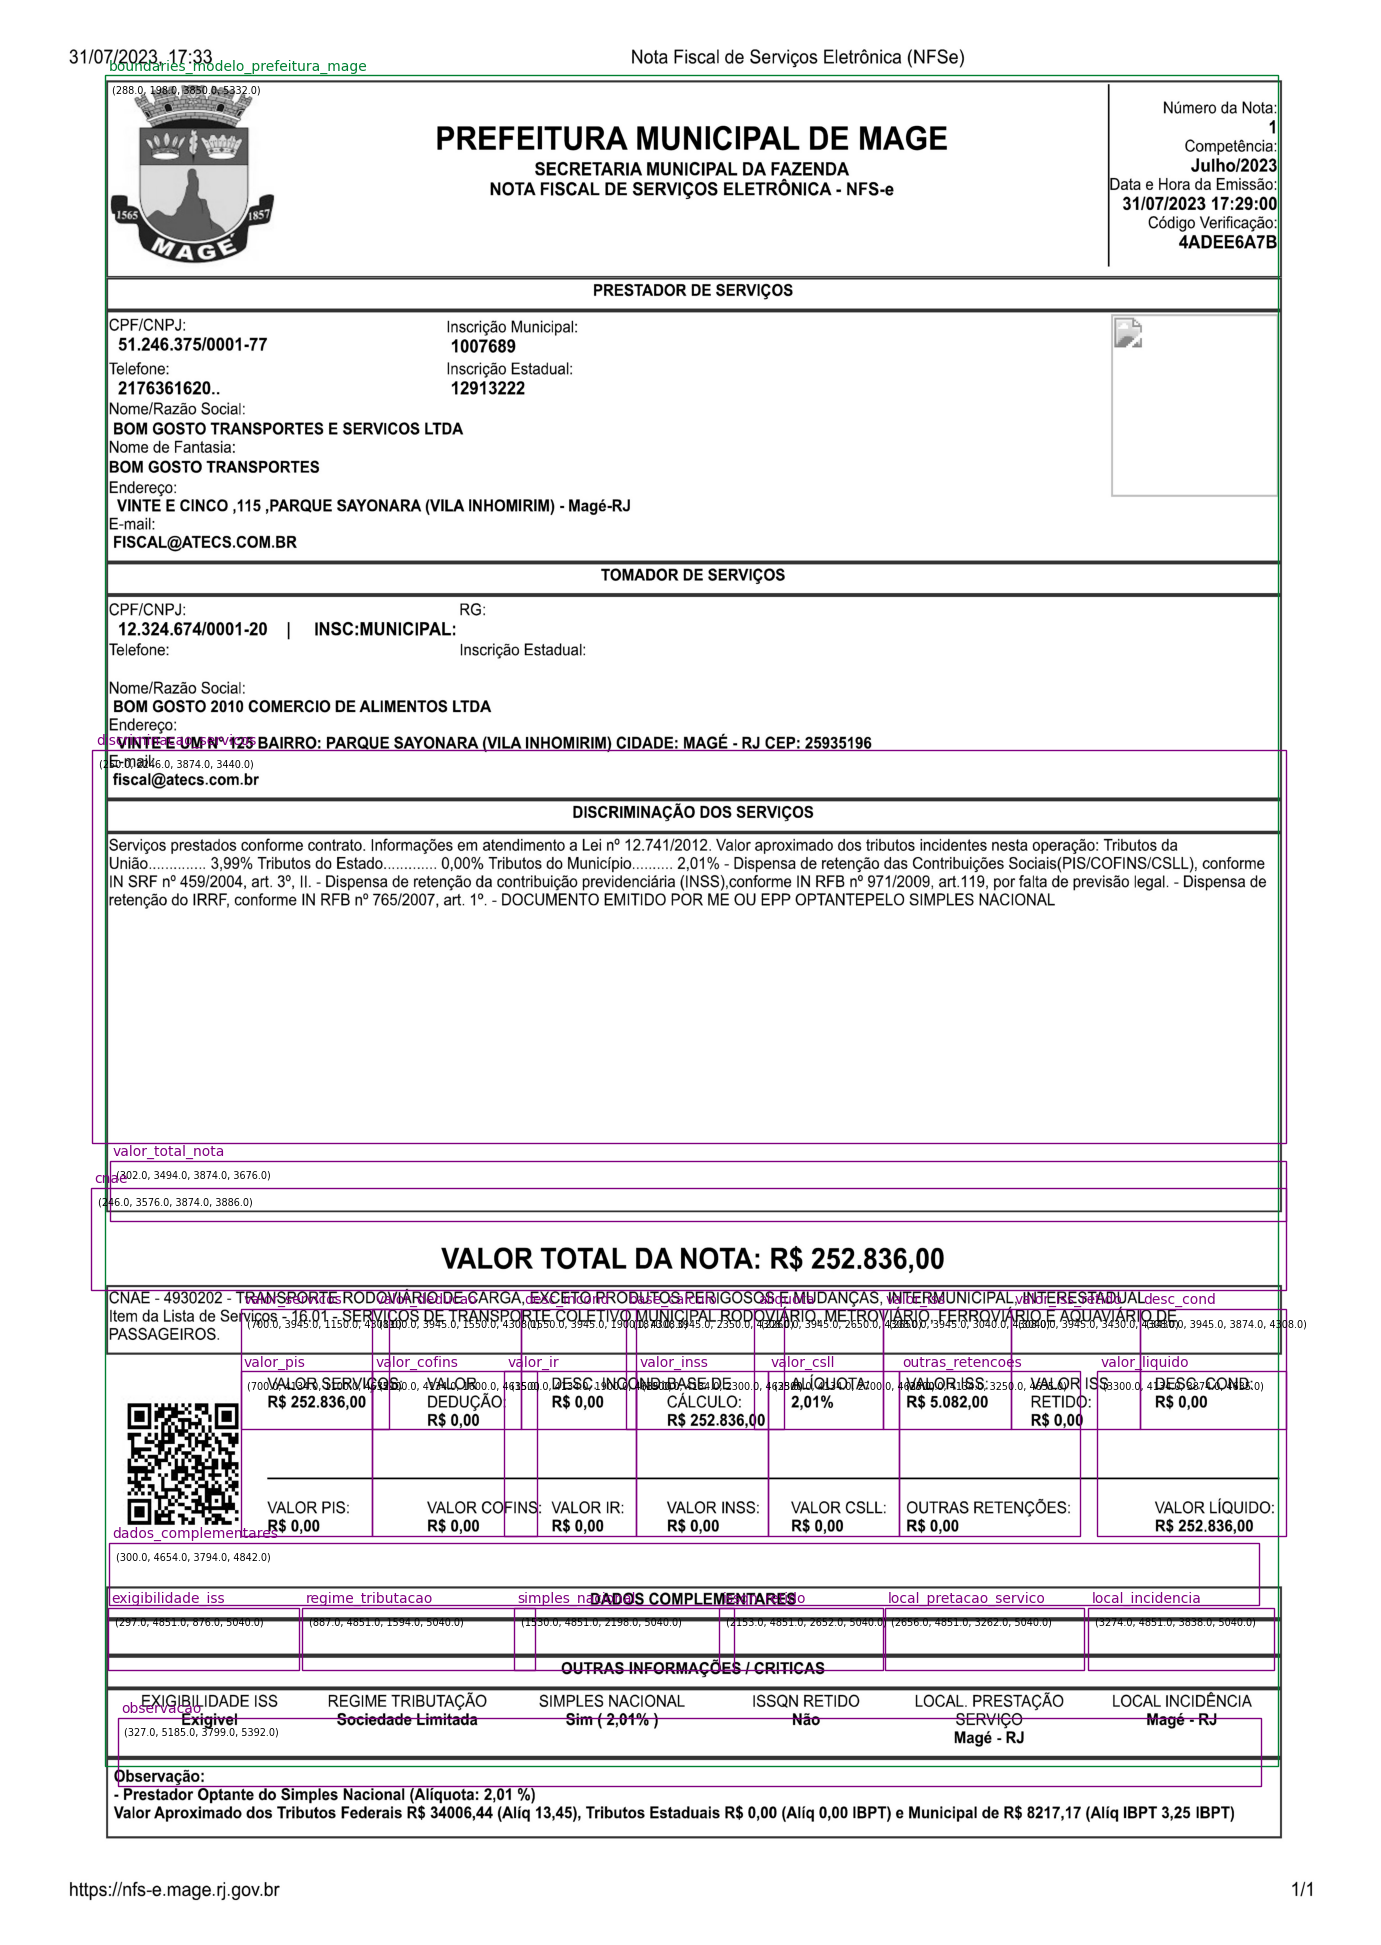

In [11]:
draw_boxes(image_np, frames_nf_v4_df, 'SPA', draw_types=['boundaries', 'field_box'])

In [ ]:
draw_boxes(image_np, frames_nf_v4_df, 'SPA', draw_types=['boundaries', 'frame', 'field_box'])

In [ ]:
# Modelo de apresentaçao da imagem
x0 = 0
y0 = 0
plt.figure(figsize=(25, 25))
plt.imshow(imagem_gray_np)
plt.axis('off')  # Desativa os eixos para uma visualização mais limpa
plt.text(x0 + 1, y0 + 10,original_file_name, color='black', fontsize=20)
#plt.text(original_file_name, color='black', fontsize=7)
plt.show()

In [ ]:
if mapping_method == "frame_&_sframe_field":
    tipo_4_coordinates = "frame"
    tipo_4_filter = "sframe_field"
coordinates = get_coordinates_filter_by_context(pdf_pesquisavel_map, model, context_mapping, tipo_4_coordinates)
x0, y0, x1, y1 = coordinates[0]

In [18]:
def filtrar_df(df, **kwargs):
    query = " & ".join(f"{key} == @kwargs['{key}']" for key in kwargs)
    result = df.query(query)
    return result

# 11. Pesquiso Unique_ID por file
def get_document_id_by_file(batch, file):
    
    result = filtrar_df(df_conf_validada, Batch=batch, File=file)
    document_unique_id = result['Unique_ID'].values[0]
    
    return document_unique_id

In [28]:
result = filtrar_df(df_conf_validada, batch=batch, original_file_name=file)

ValueError: data type must provide an itemsize

In [25]:
file = "NF CRJ PRIMEIRA QUINZENA DE JULHO DE 2023.pdf"
batch = "Batch_21"
Batch = "Batch_21"

In [26]:
document_unique_id = get_document_id_by_file(batch=Batch, file=file)

UndefinedVariableError: name 'Batch' is not defined

In [14]:
batch_name

NameError: name 'batch_name' is not defined

In [ ]:
original_file_name = "Doria Marinho 0297 Raquel.pdf"

In [ ]:
get_document_id_by_file

In [13]:
result = filtrar_df(df_conf0, original_file_name=original_file_name)

NameError: name 'df_conf0' is not defined

In [ ]:
result

In [ ]:
# Modelo de apresentaçao da imagem
x0 = 0
y0 = 0
plt.figure(figsize=(25, 25))
plt.imshow(result['image_np'].values[0])
plt.axis('off')  # Desativa os eixos para uma visualização mais limpa
plt.text(x0 + 1, y0 + 10,original_file_name, color='black', fontsize=20)
#plt.text(original_file_name, color='black', fontsize=7)
plt.show()

In [ ]:

image_np = result['image_np'].values[0]

In [ ]:
image_np

In [ ]:
x0 = int(x0)
y0 = int(y0)
x1 = int(x1)    
y1 = int(y1)

In [ ]:
cropped_image_np = imagem_gray_np[y0:y1, x0:x1]

In [ ]:
# Modelo de apresentaçao da imagem
x0 = 0
y0 = 0
plt.figure(figsize=(5, 5))
plt.imshow(cropped_image_np)
plt.axis('off')  # Desativa os eixos para uma visualização mais limpa
#plt.text(x0 + 1, y0 + 10,original_file_name, color='black', fontsize=20)
#plt.text(original_file_name, color='black', fontsize=7)
plt.show()

In [ ]:
cropped_image_np

In [ ]:
boxes = frames_nf_v4_df[frames_nf_v4_df['type'] == 'field_box']

In [ ]:
boxes_info = {}
i = 1
for idx, row in boxes.iterrows():
    x0 = int(row['x0'])
    y0 = int(row['y0'])
    x1 = int(row['x1'])
    y1 = int(row['y1'])
    cropped_image_np = imagem_gray_np[y0:y1, x0:x1]
    
    boxes_info[f'box_{i}'] = {
        'coordinates': (x0, y0, x1, y1),
        'image': cropped_image_np,
        # ... qualquer outra informação que você deseja armazenar
    }
    i += 1


In [ ]:
boxes_info['box_1']['coordinates']

In [ ]:
boxes_info['box_1']['image']

In [ ]:
for box in boxes_info:
    x0, y0, x1, y1 = boxes_info[box]['coordinates']
    image = boxes_info[box]['image']
    # plt.figure(figsize=(25, 25))
    plt.imshow(image)
    plt.axis('off')  # Desativa os eixos para uma visualização mais limpa
    plt.show()

In [ ]:
i = 8

x0 = 0
y0 = 0
plt.figure(figsize=(10, 10))
plt.imshow(boxes_info[f'box_{i}']['image'])
plt.text(x0 , y0,boxes_info[f'box_{i}']['coordinates'], color='green', fontsize=7)
plt.axis('off')  # Desativa os eixos para uma visualização mais limpa
plt.show()


In [ ]:
# Inicialize um dicionário vazio para armazenar as informações dos "boxes"
boxes_info = {}

# Suponha que você está em um loop onde está processando vários "boxes"
for i, box in enumerate(boxes):
    # Obtenha as coordenadas do "box"
    x0, y0, x1, y1 = coordinates[0] 
    # Corte a área do "box" da imagem original
    cropped_image = imagem_gray_np[y0:y1, x0:x1]
    
    # Armazene as informações do "box" no dicionário
    boxes_info[f'box_{i}'] = {
        'coordinates': (x0, y0, x1, y1),
        'image': cropped_image,
        # ... qualquer outra informação que você deseja armazenar
    }

# Agora, `boxes_info` contém informações detalhadas sobre cada "box"


In [ ]:
import cv2
import numpy as np

# Variáveis para armazenar as coordenadas do retângulo
startX, startY, endX, endY = -1, -1, -1, -1
drawing = False

def draw_rectangle(event, x, y, flags, param):
    global startX, startY, endX, endY, drawing

    # Se o botão esquerdo do mouse for pressionado, comece a desenhar o retângulo
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        startX, startY = x, y

    # Se o botão esquerdo do mouse for solto, finalize o retângulo
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        endX, endY = x, y
        cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)

# Carregue sua imagem como um array NumPy
img = np.copy(image_np) # Substitua 'image_np' pelo seu array NumPy da imagem

# Crie uma janela e atribua a função de callback
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", draw_rectangle)

while True:
    # Exibe a imagem
    cv2.imshow("Image", img)
    
    # Se a tecla 'q' for pressionada, saia do loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Fecha todas as janelas OpenCV
cv2.destroyAllWindows()


<h3><mark> <b>2.3.3.0</b> Ajustando medidas</mark></h3>

<mark> IMPORTANTE: </mark> processo de ajustar coordenadas no frames_nf_v4_df e depois salvalas 

In [ ]:
file_path = "pipeline_extracao_documentos/0_arquivos_teste_pipeline/pdf_pesquisavel/Mage/NF 6235.pdf"

In [ ]:
file_path = "pipeline_extracao_documentos/2_documentos_para_extracao/21_aguardando_processamento/Batch_20/fwdnotasfaltantesnosistemadeemissoim20734_106187/Doria Marinho 0301 Ultrascan.pdf"
original_file_name = os.path.basename(file_path)

section = "9. OUTRAS INFORMAÇOES / CRITICAS"
tipo = "field_box"
father_value = "5_frame_inf_criticas"
model_map = "MAGE"
de_para_pm = "PM_MAGE"

In [ ]:
### Foi copiada - somente para referencia
def convert_resize_gray(original_file_name, file_path, image_resized_path):

    name_image = conv_filename_no_ext(original_file_name)
    image_resized_name = os.path.join(f'{image_resized_path}/{str(name_image)}.jpg')
    pages = convert_from_path(file_path, 500, poppler_path=poppler_path)
    # 4. Verifica se ha mais que uma pagina
    if len(pages) > 1:
        raise ValueError("Erro, documento com mais de uma página")
    else:
        # 5. Iterar pelas páginas e redimensionar
        resized_pages = []
        for page in pages:
            resized_page = page.resize((4134, 5846))
            resized_pages.append(resized_page)
            
    imagem_gray = resized_pages[0].convert('L')
    imagem_gray.save(image_resized_name, 'JPEG')

    return  imagem_gray, image_resized_name

In [ ]:
# Nota de mage que nao bateu as coordenadas
file_path = "pipeline_extracao_documentos/0_arquivos_teste_pipeline/pdf_pesquisavel/Mage_fora_padrao/1128 desmonte em 01-08-23.pdf"

In [ ]:
# Processo para acertar as coordenadas de frames_nf_v4_df

novo_x0 = 700
novo_y0 = 3895
novo_x1 = 3900
novo_y1 = 4500

frames_nf_v4_df.at[indice_original, 'x0'] = novo_x0
frames_nf_v4_df.at[indice_original, 'y0'] = novo_y0
frames_nf_v4_df.at[indice_original, 'x1'] = novo_x1
frames_nf_v4_df.at[indice_original, 'y1'] = novo_y1

In [ ]:
# Para pesquisar as colunas que quero
frames_nf_v4_df[['model', 'section_json', 'label', 'reference', 'x0', 'y0', 'x1', 'y1']].head(49)

In [ ]:
frames_nf_v4_df

In [ ]:
# Path para leitura do arquivo excel do DF frames_nf_v4_df_path  (ATUALIZAR DOCUMENTO)
frames_nf_v4_df_path = "pipeline_extracao_documentos/6_geral_administacao/modelos/frames_nf_v10.xlsx"

#Le a planilha e cria do DF
frames_nf_v4_df = pd.read_excel(frames_nf_v4_df_path)

In [ ]:
# Path para leitura do arquivo excel do DF frames_nf_v4_df_path  (ATUALIZAR DOCUMENTO)
frames_nf_v4_df_path = "pipeline_extracao_documentos/6_geral_administacao/modelos/frames_nf_v10.xlsx"


# Salvando o DF para excel
frames_nf_v4_df.to_excel(frames_nf_v4_df_path, index=False)

In [ ]:
# Path para salvar o arquivo excel do DF frames_nf_v4_df_path  (ATUALIZAR DOCUMENTO)
frames_nf_v4_df_path = "pipeline_extracao_documentos/6_geral_administacao/modelos/frames_nf_v10.xlsx"

# Salvando o DF para excel
frames_nf_v4_df.to_excel(frames_nf_v4_df_path, index=False)

In [ ]:
# Listando 59 linhas do dataframe
frames_nf_v4_df.head(49)

In [ ]:
# Encontrar o índice da linha no DataFrame original
indice_original = row_frame.index[0]

# Atualizando o valor diretamente no DataFrame original
novo_valor_x0 = ...  # Substitua com o novo valor
frames_nf_v4_df.at[indice_original, 'x0'] = novo_valor_x0

# Verificando se o valor foi atualizado no DataFrame original
print(frames_nf_v4_df.at[indice_original, 'x0'])


In [ ]:
image_path = "imagem_gray.jpg"

In [ ]:
document_info = frames_nf_v4_df[frames_nf_v4_df['type'] == 'document'].iloc[0]
boundaries_info = frames_nf_v4_df[frames_nf_v4_df['type'] == 'boundaries']
sections_info = frames_nf_v4_df[frames_nf_v4_df['type'] == 'section']
frames_info = frames_nf_v4_df[frames_nf_v4_df['type'] == 'frame']
sframe_fields_info = frames_nf_v4_df[frames_nf_v4_df['type'] == 'sframe_field']
field_boxes_info = frames_nf_v4_df[frames_nf_v4_df['type'] == 'field_box']

In [ ]:
frames_nf_v4_df[frames_nf_v4_df['type'] == 'document'].iloc[0]
frames_nf_v4_df[frames_nf_v4_df['type'] == 'boundaries']
frames_nf_v4_df[frames_nf_v4_df['type'] == 'section']
frames_nf_v4_df[frames_nf_v4_df['type'] == 'frame']
frames_nf_v4_df[frames_nf_v4_df['type'] == 'field_box']

In [ ]:
field_boxes_info 

In [ ]:
frames_info

In [ ]:
model = "MAGE"
modelo = "MAGE"

In [ ]:
from PIL import Image
image = Image.open("imagem_gray.jpg")

In [ ]:
document_unique_id = result['Unique_ID'].values[0]

In [ ]:
df['coluna_cnae'] = df['coluna_cnae'].apply(lambda x: x.strip() if isinstance(x, str) else x)
